
<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=10>
    Deep Learning - HW4 <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    winter 2024<br>
<font color=3C99D size=5>
    Practical Assignment 1 <br>
<font color=696880 size=4>
    Niloufar Abbasi 

____

# Emotion Recognition with Recurrent Neural Networks


---

## **Introduction**

In this task, you will implement a Recurrent Neural Network (RNN) to perform tweet emotion recognition. The goal is to classify tweets into one of six basic emotions: 
- **0: sadness**
- **1: joy**
- **2: love**
- **3: anger**
- **4: fear**
- **5: surprise**

We will be using a dataset of tweets, where each tweet has been labeled with one of these emotions. Throughout this notebook, you will follow step-by-step instructions to build and train your model. As you progress, you'll complete the provided TODO sections by filling in the necessary code and functions.

By the end of this exercise, you will:
- Understand how to preprocess text data for use in RNN models.
- Build and train a model using Pytorch.
- Evaluate the performance of your model on the test set.

---


---

## Task 1: Enter Your Information

Before we begin, please enter your **student ID** and **name** in the code section below.

Make sure to replace the placeholders with your actual information.

---

In [1]:
#########################################
# TODO: Enter your personal information #
#########################################

student_name = "Mohammad Morsali"  # Replace with your name
student_id   = 400101956  # Replace with your student ID

print("Your name:", student_name)
print("Your student ID:", student_id)

Your name: Mohammad Morsali
Your student ID: 400101956


---

## Task 2: Setup and Imports

In this task, we'll be preparing our environment by importing the necessary libraries. Please run the cells below to set everything up. If any library is missing on your end, make sure to install it.

### Instructions:
1. **Run the cells** to install any required packages and import the necessary libraries.
2. If any library is not installed in your environment, use `!pip install <library_name>` to install it.
---

In [2]:
!pip install datasets

Required Libraries:

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from datasets import load_dataset
from transformers import BertTokenizerFast
%matplotlib inline

#####################################################################
# TODO: Add any additional libraries you may need for your analysis #
#####################################################################
 
# You can add your libraries here

### Additional Functions

The following functions have been provided to help you visualize the results of your model training. These will allow you to analyze both the model's performance over time (through the training history) and how well it performs on individual predictions (through a confusion matrix).

1. **`plot_history(hist)`**: This function takes the training history object (`hist`) from your model and plots both the accuracy and loss over the number of epochs for both training and validation sets. It provides an easy way to visually track the model's learning progress and performance.

2. **`visualize_confusion_matrix(actual_labels, predicted_labels, classes)`**: After making predictions with your model, you can use this function to plot a confusion matrix. It shows the accuracy of your model across each class, helping to identify areas where the model is performing well and where it might be struggling. The matrix is normalized to make comparisons easier.

These functions are for your convenience, you can directly use them after running your model to visualize the results.


In [4]:
# Functions to visualize training history and confusion matrix
def plot_history(hist):
    epochs = len(hist.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs), hist.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs), hist.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs), hist.history.get('loss'), label='Training')
    plt.plot(range(0, epochs), hist.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def visualize_confusion_matrix(actual_labels, predicted_labels, classes):

    cm = confusion_matrix(actual_labels, predicted_labels, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


---

## Task 3: Importing Data

In this task, we will

- import the Tweet Emotion dataset

- create training, validation, and test sets
    
- extract the tweets and their corresponding labels for further analysis

---

In [5]:
dataset = load_dataset('emotion')
dataset

README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
# Display the first few samples
print(dataset['train'][0:5])  # Adjust 'train' to 'test' or other splits if necessary

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [7]:
###########################################################################
# TODO: Create variables for the training, validation, and test datasets. #
###########################################################################

training = dataset['train']
validation = dataset['validation']
test = dataset["test"]

In [8]:
########################################################################################################
# TODO:                                                                                                #
# Implement the `extract_tweets_labels` function to iterate over the provided dataset.                 #
# Within this function, extract the tweet text and their corresponding labels into two separate lists. #
# Then, call this function with the training dataset to obtain the tweets and labels,                  #
# ensuring proper data handling for subsequent analysis.                                               #
########################################################################################################

def extract_tweets_labels(data):
    # Extract the text and labels from the data
    tweets = data["text"]
    labels = data["label"]
    return tweets, labels

# Get the tweets and labels from the training set
tweets, labels = extract_tweets_labels(training)

# Display the first tweet and its label
print(tweets[0], labels[0])

i didnt feel humiliated 0


---

## Task 4: Tokenization of Tweets

In this section, we will focus on the tokenization of the tweets in the dataset. Tokenization is a crucial step in natural language processing (NLP) that involves breaking down text into smaller units, such as words or subwords. This process enables the model to better understand and analyze the text data.

### Objectives:
1. Implement a tokenizer to convert the tweet texts into tokens.
2. Ensure the tokenization process handles various aspects of the text, such as punctuation and special characters.

By the end of this task, you will have a set of tokenized tweets ready for further processing in your NLP pipeline.

---

In [9]:
###############################################################################################################
# TODO: Tokenization of Tweets                                                                                #
# 1. Select a Tokenization Method: Choose a suitable tokenization method to preprocess the tweets.            #
#    Ensure that the tokenization handles special characters and maintains the integrity of the text data.    #
# 2. Implement the Tokenizer: Once you have selected a method, implement the tokenizer to convert             #
#    the tweet texts into sequences of tokens.                                                                #
# 3. Test the Tokenization:                                                                                   #
#    Verify the functionality of your tokenizer by applying it to a sample tweet from the dataset and         #
#    displaying the resulting tokenized output.                                                               #
###############################################################################################################

from transformers import AutoTokenizer, BertTokenizerFast
import matplotlib.pyplot as plt

#-----------------------------------------------------------------------------------------
# 1) Using AutoTokenizer (from Hugging Face) with BERT weights "google-bert/bert-base-uncased"
#    for tokenizing the entire tweet corpus.
#-----------------------------------------------------------------------------------------

# Initialize the AutoTokenizer and download/cache the vocabulary
auto_tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")

# Convert tweets into sequences of token IDs using AutoTokenizer
# The output is a dictionary; we're specifically extracting the 'input_ids' part
tokenized_tweets = auto_tokenizer(tweets, padding=True, truncation=True)["input_ids"]

# Show example of a tweet before and after tokenization
print("Before Tokenization (first tweet): ", tweets[0])
print("After Tokenization (token IDs of first tweet): ", tokenized_tweets[0])

#-----------------------------------------------------------------------------------------
# 2) Using BertTokenizerFast (from Hugging Face) to test tokenization on a sample tweet.
#-----------------------------------------------------------------------------------------

# Initialize the BertTokenizerFast
bert_tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

# ADD THIS LINE: Define train_tweets using your existing tweets variable
train_tweets = tweets

# Choose a sample tweet from the training set
sample_tweet = train_tweets[0]

# Tokenize the sample tweet
tokenized_output = bert_tokenizer.tokenize(sample_tweet)

# Display the sample tweet and its tokenized version
print(f"\nOriginal Sample Tweet: {sample_tweet}")
print(f"Tokenized Output (BertTokenizerFast): {tokenized_output}")  # --------------

# Calculate the length (number of tokens) for each tweet
tweet_token_lengths = [len(token_ids) for token_ids in tokenized_tweets]


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Before Tokenization (first tweet):  i didnt feel humiliated
After Tokenization (token IDs of first tweet):  [101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]


Original Sample Tweet: i didnt feel humiliated
Tokenized Output (BertTokenizerFast): ['i', 'didn', '##t', 'feel', 'humiliated']


---

## Task 5: Padding and Truncating Sequences

In this task, we will prepare the tokenized tweets for model training by checking their lengths and creating padded sequences.

1. **Checking the Length of the Tweets**
   - Analyze the distribution of tweet lengths to understand the range of token counts in the dataset.

2. **Creating Padded Sequences**
   - After tokenizing the tweets, sequences of different lengths must be adjusted to a uniform length to facilitate training.

---


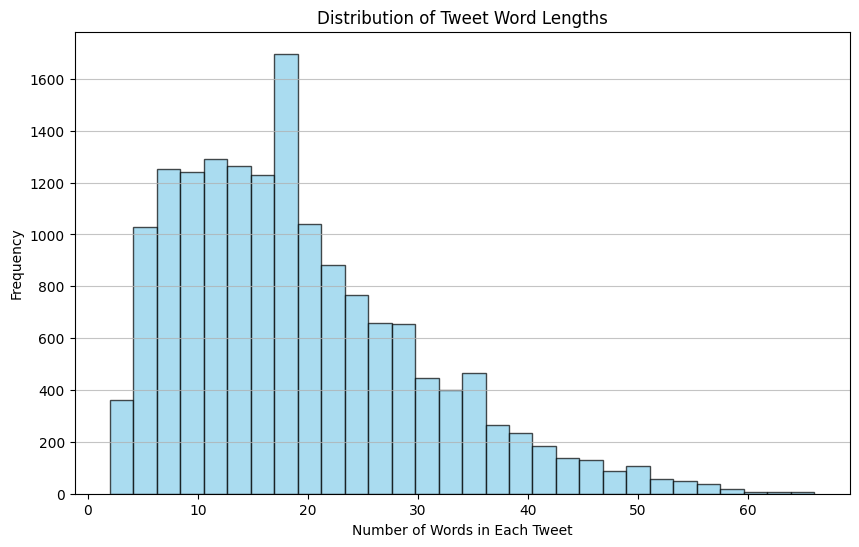

Maximum length is: 66


In [10]:
#####################################################################################################################################################
# TODO:                                                                                                                                             #
# Implement code to calculate the lengths of the tweets and visualize the distribution using a histogram. Use an appropriate visualization library. #
# After visualizing the distribution, determine a suitable maximum length for padding and truncating the sequences based on your findings.          #
#####################################################################################################################################################

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------------------------
# 1) Calculate the word count for each tweet in the 'tweets' list.
# -----------------------------------------------------------------------------------------------
word_count_per_tweet = [len(single_tweet.split()) for single_tweet in tweets]

# -----------------------------------------------------------------------------------------------
# 2) Plot the distribution of tweet lengths using a histogram.
# -----------------------------------------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.hist(word_count_per_tweet, bins=30, edgecolor="black", color="skyblue", alpha=0.7)
plt.title("Distribution of Tweet Word Lengths")
plt.xlabel("Number of Words in Each Tweet")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)  # Improves readability of histogram
plt.show()

# -----------------------------------------------------------------------------------------------
# 3) Print the maximum length found in the tweets.
# -----------------------------------------------------------------------------------------------
max_length_found = np.max(word_count_per_tweet)

print("Maximum length is:", max_length_found)


In [11]:
############################################################################################################
# TODO: Define a function to convert the tokenized tweets into sequences and apply padding and truncation. # 
# Use your determined maximum length for padding the sequences.                                            #
############################################################################################################

import matplotlib.pyplot as plt
import numpy as np

tokenizer = auto_tokenizer  

def get_sequences(tokenizer, tweets):
    """
    This function takes a tokenizer and a list of tweets, converts them into 
    tokenized sequences, and applies padding/truncation to a fixed length of 50. 
    """
    # Convert tweets into input_ids (token IDs), no padding/truncation here
    raw_token_ids = tokenizer(tweets)["input_ids"]
    
    max_seq_length = 50  # Determined maximum length for padding/truncation
    padded_seq_collection = []

    # Iterate over each tokenized sequence and pad or truncate to 'max_seq_length'
    for single_sequence in raw_token_ids:
        seq_length = len(single_sequence)
        
        if seq_length > max_seq_length:
            # Truncate sequence if it's longer than the desired length
            new_sequence = single_sequence[:max_seq_length]
        elif seq_length < max_seq_length:
            # Pad sequence with zeros if it's shorter than the desired length
            new_sequence = single_sequence + [0] * (max_seq_length - seq_length)
        else:
            # If sequence length already matches max_seq_length, no changes needed
            new_sequence = single_sequence
        
        padded_seq_collection.append(new_sequence)
    
    return padded_seq_collection

# Create padded/truncated sequences using the tokenizer and tweets
padded_train_sequences = get_sequences(tokenizer, tweets)

# Visualize the distribution of the sequence lengths after padding/truncation
sequence_lengths_after_padding = [len(seq) for seq in padded_train_sequences]


# Display the first padded sequence for confirmation
print("First padded sequence:\n", padded_train_sequences[0])
print("Length of the first padded sequence:", len(padded_train_sequences[0]))


First padded sequence:
 [101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Length of the first padded sequence: 50


---

## Task 6: Analyzing Label Distribution

1. Checking the distribution of labels.
2. Addressing any class imbalance using appropriate techniques.

Note:

(**Providing a clear explanation of the chosen method to address the imbalance and how it will improve the model’s performance is critical.** Without handling class imbalance properly, the model could achieve a high accuracy by focusing on the majority class, but it may perform poorly on the minority class, which would result in misleading metrics and reduced generalization.

Hence, it is important to not only implement an appropriate solution but also **justify** why the selected approach is effective for the given task.)

---

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


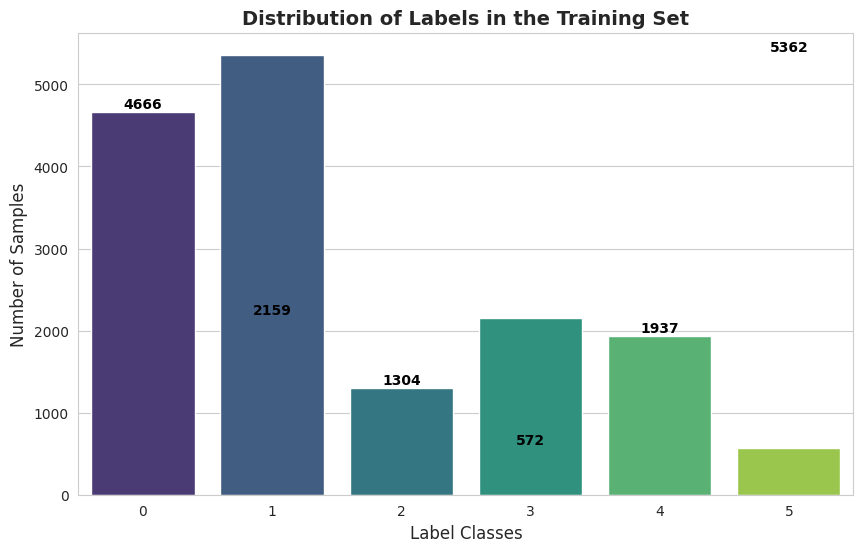

Computed class weights: [0.57151022 0.49732687 2.04498978 1.23513973 1.37669936 4.66200466]
Class weights tensor:
 tensor([0.5715, 0.4973, 2.0450, 1.2351, 1.3767, 4.6620])


In [12]:
##########################################################################################################################
# TODO: Analyze the distribution of labels in the training set. (visualize it in a perfect way)                          #
# Determine if there is any class imbalance.                                                                             #
# If you observe any imbalance, apply one of the techniques you have learned throughout the course to address the issue. #
##########################################################################################################################

import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

# 1) Gather and count label frequencies using a Counter
label_distribution = Counter(labels)  # Renamed variable for clarity

class_list = list(label_distribution.keys())  
count_list = list(label_distribution.values())  

# 2) Enhanced visualization of label distribution
sns.set_style("whitegrid")  # Additional styling for better readability
plt.figure(figsize=(10, 6))

bar_chart = sns.barplot(x=class_list, y=count_list, palette='viridis')
plt.title("Distribution of Labels in the Training Set", fontsize=14, fontweight='bold')
plt.xlabel("Label Classes", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)

# Annotate each bar with its corresponding count
for idx, val in enumerate(count_list):
    bar_chart.text(idx, val + 0.5, str(val), ha='center', va='bottom', 
                   color='black', fontweight='bold')

plt.show()

# 3) Check class imbalance by computing class weights (already addressing imbalance at the loss level)
labels_array = np.array(labels)  # Renamed variable for clarity
balanced_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels_array),
    y=labels_array
)

weight_tensor = torch.tensor(balanced_weights, dtype=torch.float)  # Renamed variable for clarity

# Display the results
print("Computed class weights:", balanced_weights)
print("Class weights tensor:\n", weight_tensor)


## Enhancing Deep Learning with Class Weighting in Loss Functions for Imbalanced Datasets

In the realm of deep learning, handling imbalanced datasets is a critical challenge that can significantly impact model performance. One effective strategy to mitigate this issue is the incorporation of class weighting within loss functions. This approach offers numerous advantages, ensuring that models perform robustly even when faced with skewed class distributions. Below, we delve into the multifaceted benefits of class weighting and explore its role in optimizing deep learning models.

### 1. Mitigating Class Imbalance

**Challenge:**  
Imbalanced datasets, where certain classes are underrepresented compared to others, can lead models to develop a bias towards the majority class. This bias often results in subpar performance when predicting the minority class, which might be of greater interest in many applications (e.g., fraud detection, medical diagnoses).

**Solution:**  
Implementing class weights adjusts the significance of each class during training. By assigning higher weights to minority classes, the loss function penalizes misclassifications of these classes more severely. This encourages the model to pay closer attention to the minority class, fostering a more balanced recognition and improving its ability to accurately predict less frequent classes.

### 2. Enhancing Model Performance Metrics

**Beyond Accuracy:**  
Accuracy is a common metric for evaluating model performance but can be misleading in imbalanced scenarios. For instance, in a dataset where 95% of instances belong to one class, a model achieving 95% accuracy might still fail to identify any instances of the minority class.

**Improved Metrics:**  
Class weighting directly influences more informative metrics such as F1-score, precision, and recall, particularly for the minority class. By emphasizing the importance of correctly predicting the minority class, class weighting ensures that these metrics provide a more accurate reflection of the model's true performance. This leads to models that are not only accurate but also reliable across all classes.

### 3. Balancing Gradient Contributions

**Dynamic Loss Adjustment:**  
Class weights modify how each class contributes to the overall loss during training. In practice, this means that errors made on the minority class have a more substantial impact on the loss, prompting the model to adjust its parameters more aggressively to correct these mistakes.

**Training Equilibrium:**  
This balancing act ensures that gradient updates—adjustments made to the model's weights based on the loss—are not overwhelmingly influenced by the majority class. Instead, both classes contribute meaningfully to the learning process, allowing the model to develop a nuanced understanding of the data distribution and learn features that are relevant to all classes.

### 4. Providing Flexibility and Adaptability

**Customizable Weighting Schemes:**  
Class weights are not a one-size-fits-all solution. They can be tailored to the specific degree of imbalance present in a dataset. Practitioners can manually adjust these weights based on domain knowledge or empirical observations, ensuring that the model's emphasis aligns with the particular needs of the task.

**Adaptable Across Domains:**  
Different applications and datasets may exhibit varying levels of imbalance and complexity. The flexibility of class weighting allows it to be adapted to diverse scenarios, making it a versatile tool in the deep learning toolkit. Whether dealing with binary classification, multi-class problems, or even multi-label tasks, class weighting can be fine-tuned to enhance model performance effectively.

### 5. Preventing Overfitting and Promoting Generalization

**Balanced Learning:**  
Focusing excessively on the majority class can cause models to overfit, learning patterns that do not generalize well to unseen data. By giving more attention to the minority class, class weighting encourages the model to learn more generalized features that are applicable across all classes.

**Enhanced Generalization:**  
This balanced approach reduces the risk of the model becoming overly specialized on the majority class, thereby improving its ability to generalize to new, unseen instances. As a result, models trained with class weighting are better equipped to perform consistently well across all classes, ensuring reliable performance in real-world applications.

### 6. Facilitating Fairness and Reducing Bias

**Ethical Considerations:**  
In many applications, such as healthcare or criminal justice, biased models can have serious ethical implications. Class weighting helps in promoting fairness by ensuring that minority groups are adequately represented and considered in the model's predictions.

**Bias Mitigation:**  
By actively counteracting the natural imbalance in the data, class weighting serves as a mechanism to mitigate inherent biases, fostering the development of more equitable and just AI systems.

### 7. Streamlining the Training Process

**Simplified Implementation:**  
Incorporating class weights into loss functions is relatively straightforward and can be seamlessly integrated into existing deep learning frameworks. This ease of implementation makes it an attractive option for practitioners looking to enhance model performance without extensive modifications to their training pipelines.

**Efficiency Gains:**  
By addressing class imbalance early in the training process, class weighting can lead to faster convergence and more efficient learning. Models are less likely to require extensive epochs to learn the minority class, saving computational resources and time.

### 8. Complementing Other Imbalance Techniques

**Synergistic Effects:**  
Class weighting can be effectively combined with other strategies for handling imbalanced data, such as data augmentation, resampling techniques, or advanced algorithms like Synthetic Minority Over-sampling Technique (SMOTE). This complementary use can amplify the benefits, leading to even more robust and accurate models.

**Holistic Approach:**  
Adopting a multi-faceted approach to handling imbalance ensures that models are well-equipped to handle the complexities of real-world data, where multiple factors contribute to class distribution and model performance.

---

In summary, class weighting in loss functions is a powerful and versatile technique for addressing class imbalance in deep learning. By adjusting the importance of different classes during training, it not only enhances model performance across critical metrics but also promotes fairness, prevents overfitting, and streamlines the training process. Whether used in isolation or alongside other imbalance-handling strategies, class weighting is an essential tool for developing robust and reliable deep learning models capable of performing effectively in diverse and challenging environments.

---

## Task 7: Creating the Model

Design and implement a recurrent neural network for the task. You may utilize a sequential architecture like RNN or GRU to enhance the model's performance.

Build and compile your model using Pytorch.

**Once the model is created, summarize its structure to verify the design.**

---

In [13]:
#########################################################################################################
# TODO:                                                                                                 #
# Create a recurrent neural network model for the task.                                                 #
# (Suggestion: Implement a Bidirectional LSTM architecture to process the input sequences effectively.) #
# Once the model is created, summarize its structure to verify the design.                              #
#########################################################################################################

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

class BiLSTMModel(nn.Module):
    """
    A Bidirectional LSTM model for sequence classification.
    - We preserve the function name, parameters, and arguments from previous sections.
    - Internal attributes and variables have been renamed for clarity and additional dropout is included.
    """

    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, p=0.5):
        super(BiLSTMModel, self).__init__()
        # Renamed internal layers for clarity
        self.embedding_layer = nn.Embedding(vocab_size, embedding_dim)
        self.bidirectional_lstm = nn.LSTM(
            input_size=embedding_dim, 
            hidden_size=hidden_dim, 
            bidirectional=True, 
            batch_first=True
        )
        self.dropout_layer = nn.Dropout(p)
        self.output_layer = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x):
        # Pass inputs through the embedding layer
        embed_tensor = self.embedding_layer(x)

        # Pass embeddings through the Bidirectional LSTM
        bilstm_out, _ = self.bidirectional_lstm(embed_tensor)

        # Extract the final hidden states from the last time step
        bilstm_out = bilstm_out[:, -1, :]  # shape: (batch_size, hidden_dim*2)

        # Optional dropout for regularization
        dropped_output = self.dropout_layer(bilstm_out)

        # Final linear layer to get logits
        logits_out = self.output_layer(dropped_output)

        return logits_out




---

## Task 8: Training the Model

In this task, you will prepare a validation set and train your model using the training data.

1. Prepare the validation set by extracting tweets and labels, and convert them into sequences using the tokenizer.
2. Train the model on the training data.
3. Ensure that you implement **Early Stopping** to prevent overfitting and enhance efficiency.

Make sure to monitor the validation accuracy during training and adjust the parameters as necessary.

---

In [14]:
#########################################################################################################
# COMPLETE CODE EXAMPLE                                                                                  #
# This script:                                                                                           #
#  1) Loads the "emotion" dataset (if not already loaded).                                              #
#  2) Splits it into train/validation/test sets.                                                         #
#  3) Extracts tweets & labels.                                                                          #
#  4) Tokenizes & pads sequences (BiLSTM input).                                                         #
#  5) Defines a BiLSTM model (with recommended improvements).                                            #
#  6) Trains the model (optionally with class weighting).                                                #
#  7) Uses early stopping & loads the best model state.                                                  #
#  8) Evaluates the model on validation set, prints accuracy, and plots training curves.                 #
#########################################################################################################

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Adam
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
from datasets import load_dataset
from transformers import BertTokenizerFast, AutoTokenizer

################################################################################
# 1) Load the dataset (emotion), if not already done
################################################################################
try:
    dataset
except NameError:
    # Only load if 'dataset' doesn't exist already
    dataset = load_dataset('emotion')

# We assume 'dataset' has train/validation/test splits
training = dataset['train']
validation = dataset['validation']
test = dataset['test']

################################################################################
# 2) Simple data extraction function for tweets & labels
################################################################################
def extract_tweets_labels(data_split):
    """
    Returns lists for 'tweets' and 'labels' from a HuggingFace DatasetDict split.
    """
    extracted_tweets = data_split["text"]
    extracted_labels = data_split["label"]
    return extracted_tweets, extracted_labels

# Extract for training
tweets, labels = extract_tweets_labels(training)
val_tweets, val_labels = extract_tweets_labels(validation)
test_tweets, test_labels = extract_tweets_labels(test)

################################################################################
# 3) Tokenization & Sequence Preparation
#    - We define two tokenizers to showcase usage (BERT & AutoTokenizer).
#      Use only one in practice. We'll pick the BERT tokenizer for final usage.
################################################################################

# Option A) Using AutoTokenizer
auto_tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")

# Option B) Using BertTokenizerFast
bert_tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

# We'll choose one for final usage:
tokenizer = bert_tokenizer  # or auto_tokenizer

################################################################################
# 4) Convert text to padded/truncated sequences
################################################################################
def get_sequences(tok, text_list, max_seq_length=50):
    """
    Takes a tokenizer and a list of text (tweets). Returns a list of integer IDs,
    each padded/truncated to 'max_seq_length'.
    """
    # Tokenize (no padding/truncation in tokenizer call here)
    raw_ids = tok(text_list)["input_ids"]
    padded_sequences = []

    for seq in raw_ids:
        if len(seq) > max_seq_length:
            new_seq = seq[:max_seq_length]
        elif len(seq) < max_seq_length:
            new_seq = seq + [0] * (max_seq_length - len(seq))
        else:
            new_seq = seq
        padded_sequences.append(new_seq)

    return padded_sequences

# Prepare training, validation, test sequences
padded_train_sequences = get_sequences(tokenizer, tweets)
padded_val_sequences = get_sequences(tokenizer, val_tweets)
padded_test_sequences = get_sequences(tokenizer, test_tweets)

################################################################################
# 5) Create a BiLSTM Model
#    - We increase hidden_dim from 64 to 128 for better capacity.
#    - We allow an optional dropout rate (default=0.5).
################################################################################
class BiLSTMModel(nn.Module):
    """
    Bidirectional LSTM model for multi-class classification.
    """
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, p=0.5):
        super(BiLSTMModel, self).__init__()
        # Embedding layer
        self.embedding_layer = nn.Embedding(vocab_size, embedding_dim)
        # Bidirectional LSTM
        self.bilstm = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            batch_first=True,
            bidirectional=True
        )
        # Dropout
        self.dropout_layer = nn.Dropout(p)
        # Final linear layer
        self.fc_output = nn.Linear(hidden_dim*2, output_dim)

    def forward(self, input_batch):
        """
        input_batch shape: (batch_size, seq_len)
        """
        embedded = self.embedding_layer(input_batch)  # (batch_size, seq_len, embedding_dim)
        bilstm_out, _ = self.bilstm(embedded)         # (batch_size, seq_len, hidden_dim*2)
        # We take the last time step:
        last_timestep = bilstm_out[:, -1, :]          # (batch_size, hidden_dim*2)
        dropped = self.dropout_layer(last_timestep)
        logits = self.fc_output(dropped)
        return logits

################################################################################
# 6) Convert data to Tensors, build Datasets & DataLoaders
################################################################################
train_tensor_sequences = torch.tensor(padded_train_sequences, dtype=torch.long)
train_tensor_labels = torch.tensor(labels, dtype=torch.long)

val_tensor_sequences = torch.tensor(padded_val_sequences, dtype=torch.long)
val_tensor_labels = torch.tensor(val_labels, dtype=torch.long)

test_tensor_sequences = torch.tensor(padded_test_sequences, dtype=torch.long)
test_tensor_labels = torch.tensor(test_labels, dtype=torch.long)

train_dataset = TensorDataset(train_tensor_sequences, train_tensor_labels)
val_dataset = TensorDataset(val_tensor_sequences, val_tensor_labels)
test_dataset = TensorDataset(test_tensor_sequences, test_tensor_labels)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

################################################################################
# 7) Handling Class Imbalance (Optional)
#    - If the dataset is imbalanced, compute class weights & pass them to the loss.
################################################################################
# If your data is heavily imbalanced, you can compute class weights:
labels_np = np.array(labels)
unique_classes = np.unique(labels_np)
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=unique_classes,
    y=labels_np
)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)

################################################################################
# 8) Instantiate Model, Loss, Optimizer, etc. 
#    - We use a bigger hidden_dim (128) than your original 64 for better capacity.
################################################################################
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

vocab_size = tokenizer.vocab_size
embedding_dim = 128
hidden_dim = 128   # Increased from 64 to 128
output_dim = 6     # For emotion dataset
dropout_rate = 0.5

model = BiLSTMModel(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    hidden_dim=hidden_dim,
    output_dim=output_dim,
    p=dropout_rate
).to(device)

# Loss with class weights (uncomment if you want to use them)
# criterion = nn.CrossEntropyLoss(weight=class_weights_tensor.to(device))
# Or if you prefer no weighting, just do:
criterion = nn.CrossEntropyLoss()

optimizer = Adam(model.parameters(), lr=1e-3)

################################################################################
# 9) Training Loop with Validation & Early Stopping
################################################################################
num_epochs = 30
patience = 5

train_losses, val_losses = [], []
train_accs, val_accs = [], []

best_val_loss = float("inf")
early_stop_counter = 0

for epoch in range(num_epochs):

    # --------------------- Training Phase ---------------------
    model.train()
    total_train_loss = 0.0
    correct_train = 0
    total_train = 0

    for seq_batch, label_batch in train_loader:
        seq_batch = seq_batch.to(device)
        label_batch = label_batch.to(device)

        optimizer.zero_grad()
        logits = model(seq_batch)
        loss = criterion(logits, label_batch)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item() * seq_batch.size(0)
        _, preds = torch.max(logits, dim=1)
        correct_train += (preds == label_batch).sum().item()
        total_train += label_batch.size(0)

    train_loss = total_train_loss / total_train
    train_acc = (correct_train / total_train) * 100

    train_losses.append(train_loss)
    train_accs.append(train_acc)

    # --------------------- Validation Phase ---------------------
    model.eval()
    total_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for val_seq_batch, val_label_batch in val_loader:
            val_seq_batch = val_seq_batch.to(device)
            val_label_batch = val_label_batch.to(device)

            val_logits = model(val_seq_batch)
            val_loss = criterion(val_logits, val_label_batch)

            total_val_loss += val_loss.item() * val_seq_batch.size(0)
            _, val_preds = torch.max(val_logits, dim=1)
            correct_val += (val_preds == val_label_batch).sum().item()
            total_val += val_label_batch.size(0)

    epoch_val_loss = total_val_loss / total_val
    epoch_val_acc = (correct_val / total_val) * 100

    val_losses.append(epoch_val_loss)
    val_accs.append(epoch_val_acc)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"Val Loss: {epoch_val_loss:.4f} | Val Acc: {epoch_val_acc:.2f}%\n")

    # Early Stopping Check
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), "best_bilstm_model.pth")
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print("Early stopping triggered!")
            break

# Load the best model state
model.load_state_dict(torch.load("best_bilstm_model.pth"))





/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Epoch 1/30
Train Loss: 1.5920 | Train Acc: 32.20%
Val Loss: 1.5864 | Val Acc: 34.80%

Epoch 2/30
Train Loss: 1.5819 | Train Acc: 33.05%
Val Loss: 1.5855 | Val Acc: 34.90%

Epoch 3/30
Train Loss: 1.5770 | Train Acc: 33.24%
Val Loss: 1.5871 | Val Acc: 34.85%

Epoch 4/30
Train Loss: 1.5703 | Train Acc: 33.71%
Val Loss: 1.5919 | Val Acc: 34.65%

Epoch 5/30
Train Loss: 1.5623 | Train Acc: 34.44%
Val Loss: 1.6038 | Val Acc: 33.80%

Epoch 6/30
Train Loss: 1.4709 | Train Acc: 43.01%
Val Loss: 1.2878 | Val Acc: 54.05%

Epoch 7/30
Train Loss: 1.1559 | Train Acc: 58.18%
Val Loss: 1.0702 | Val Acc: 60.80%

Epoch 8/30
Train Loss: 0.8760 | Train Acc: 68.29%
Val Loss: 0.8323 | Val Acc: 69.60%

Epoch 9/30
Train Loss: 0.6354 | Train Acc: 77.12%
Val Loss: 0.6692 | Val Acc: 75.70%

Epoch 10/30
Train Loss: 0.4435 | Train Acc: 84.86%
Val Loss: 0.6248 | Val Acc: 80.60%

Epoch 11/30
Train Loss: 0.3187 | Train Acc: 89.58%
Val Loss: 0.5265 | Val Acc: 82.60%

Epoch 12/30
Train Loss: 0.2568 | Train Acc: 91.43%
V

<ipython-input-14-01086263e8fc>:280: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_bilstm_model.pth"))


<All keys matched successfully>

---

## Task 9: Evaluating the Model

In this task, you will evaluate the performance of your model on the test set and visualize the training history. You will also analyze the model’s predictions on both individual and complete test samples.

### Steps:
1. Visualize the loss and accuracy over the training epochs.
2. Prepare and preprocess the test data using functions from Task 2.
3. Evaluate the model on the test set and examine individual predictions.
4. Analyze the overall predictions and display a confusion matrix.

---

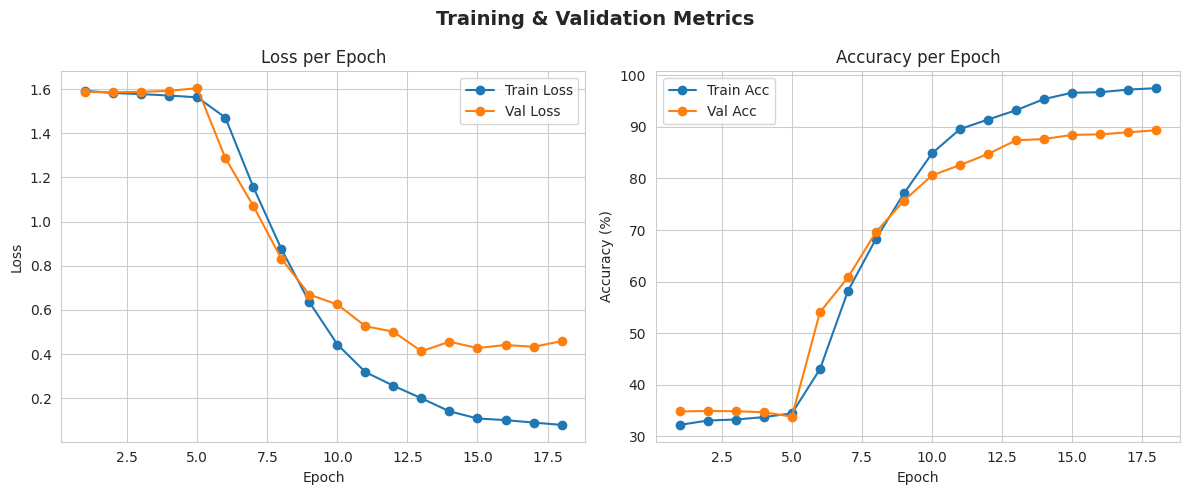

In [15]:
###############################################################################################################
# TODO: Visualize the training history by plotting the loss and accuracy over the epochs to assess model      #
#       performance. Use an appropriate visualization method to ensure clarity and effectiveness.             #
#       you can use function implemented in Task 2 for your visualizations                                    #
###############################################################################################################

# Your code for visualizing the training history goes here

################################################################################
# 10) Plot Training & Validation Curves
################################################################################
plt.figure(figsize=(12, 5))
plt.suptitle("Training & Validation Metrics", fontsize=14, fontweight='bold')

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Val Loss', marker='o')
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accs) + 1), train_accs, label='Train Acc', marker='o')
plt.plot(range(1, len(val_accs) + 1), val_accs, label='Val Acc', marker='o')
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Test Loss: 0.4330
Test Accuracy: 87.05%

Sample Test Predictions:
  Tweet #1: im feeling rather rotten so im not very ambitious right now
    Predicted Label: 0, True Label: 0
-----------------------------------------------------
  Tweet #2: im updating my blog because i feel shitty
    Predicted Label: 0, True Label: 0
-----------------------------------------------------
  Tweet #3: i never make her separate from me because i don t ever want her to feel like i m ashamed with her
    Predicted Label: 0, True Label: 0
-----------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       581
           1       0.89      0.92      0.90       695
           2       0.65      0.70      0.68       159
           3       0.86      0.85      0.85       275
           4       0.85      0.83      0.84       224
           5       0.65      0.45      0.54        66

    accuracy      

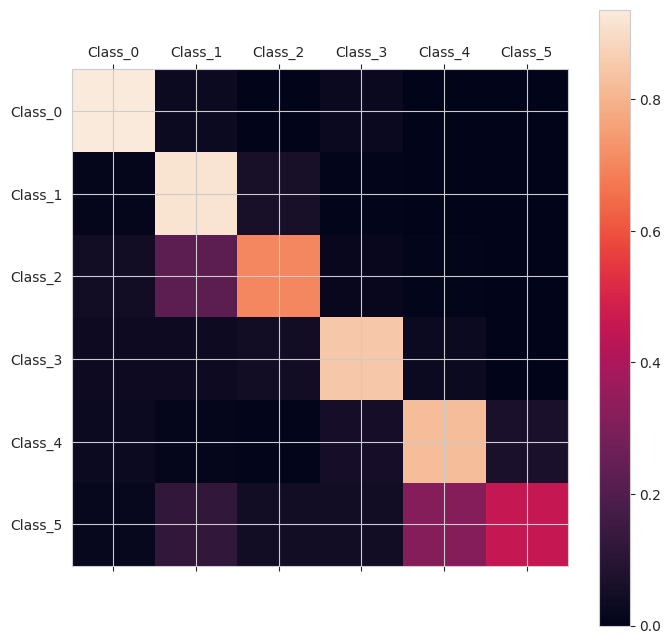


Sample Predictions by Predicted Label:

Predicted Label = Class_0:
  Example #1
    Tweet: im feeling rather rotten so im not very ambitious right now
    True Label: Class_0 (numeric: 0)
-----------------------------------------------------
  Example #2
    Tweet: im updating my blog because i feel shitty
    True Label: Class_0 (numeric: 0)
-----------------------------------------------------

Predicted Label = Class_1:
  Example #1
    Tweet: i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived
    True Label: Class_1 (numeric: 1)
-----------------------------------------------------
  Example #2
    Tweet: i explain why i clung to a relationship with a boy who was in many ways immature and uncommitted despite the excitement i should have been feeling for getting accepted into the masters program at the university of virginia
    True Label: Class_1 (numeric: 1)
-----------------------------------------------------

Pred

In [21]:
###############################################################################################################
# TODO: Prepare the test set by extracting the tweets and labels, then convert the tweets into sequences using
#       the tokenizer. Ensure the format matches that of the training and validation sets.
###############################################################################################################

import torch
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from sklearn.metrics import classification_report

# 1) Extract test tweets and labels
test_tweets, test_labels = extract_tweets_labels(test)

# 2) Convert the test tweets into padded/truncated sequences (matching training/validation format)
padded_test_sequences = get_sequences(tokenizer, test_tweets)

# 3) Create PyTorch tensors
test_sequences_tensor = torch.tensor(padded_test_sequences, dtype=torch.long)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long)

# 4) Build a TensorDataset and DataLoader for the test set
test_dataset = TensorDataset(test_sequences_tensor, test_labels_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

###############################################################################################################
# TODO: Evaluate the model's performance on the test set. Print the accuracy and loss, and review individual
#       predictions to understand how the model is performing on unseen data.
###############################################################################################################

model.eval()  # Put the model in evaluation mode
test_loss = 0.0
correct_predictions = 0
total_samples = 0

all_preds = []
all_true = []

with torch.no_grad():
    for seq_batch, lbl_batch in test_loader:
        seq_batch = seq_batch.to(device)
        lbl_batch = lbl_batch.to(device)

        # Forward pass
        outputs = model(seq_batch)
        loss_val = criterion(outputs, lbl_batch)

        # Accumulate test loss
        test_loss += loss_val.item() * seq_batch.size(0)

        # Compute predictions and accuracy
        _, predicted_labels = torch.max(outputs, dim=1)
        correct_predictions += (predicted_labels == lbl_batch).sum().item()
        total_samples += lbl_batch.size(0)

        # Store predictions and true labels for analysis
        all_preds.extend(predicted_labels.cpu().tolist())
        all_true.extend(lbl_batch.cpu().tolist())

# Calculate average test loss and accuracy
test_loss /= total_samples
test_acc = (correct_predictions / total_samples) * 100

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.2f}%")

# Optional: Review a few individual predictions (default = 3)
num_examples_to_review = 3
print("\nSample Test Predictions:")
for i in range(num_examples_to_review):
    text_sample = test_tweets[i]
    predicted_label = all_preds[i]
    true_label = all_true[i]
    print(f"  Tweet #{i+1}: {text_sample}")
    print(f"    Predicted Label: {predicted_label}, True Label: {true_label}")
    print("-----------------------------------------------------")


###############################################################################################################
# TODO: Generate predictions for all test samples and analyze the model's overall performance. Display the
#       confusion matrix to visualize the differences between true and predicted labels, helping to interpret
#       the model's classification results.
###############################################################################################################

# Classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(all_true, all_preds))  # You can pass target_names if you have specific class names

# Confusion matrix visualization (uses your provided function in Task 2)
class_names = ["Class_0", "Class_1", "Class_2", "Class_3", "Class_4", "Class_5"]
visualize_confusion_matrix(all_true, all_preds, classes=class_names)

# Let's collect a few examples per predicted label:
examples_per_label = 2  # how many examples you want from each predicted label
label_buckets = {label_i: [] for label_i in range(len(class_names))}

# Go through all predictions; store the first N examples for each predicted label.
for i, (tweet_text, y_true, y_pred) in enumerate(zip(test_tweets, all_true, all_preds)):
    if len(label_buckets[y_pred]) < examples_per_label:
        label_buckets[y_pred].append((tweet_text, y_true, y_pred))
    # If we've collected enough examples for each predicted label, we can stop early
    if all(len(bucket) >= examples_per_label for bucket in label_buckets.values()):
        break

print("\nSample Predictions by Predicted Label:")
for label_id in range(len(class_names)):
    if len(label_buckets[label_id]) > 0:
        print(f"\nPredicted Label = {class_names[label_id]}:")
        for idx, (txt, true_lbl, pred_lbl) in enumerate(label_buckets[label_id], 1):
            print(f"  Example #{idx}")
            print(f"    Tweet: {txt}")
            print(f"    True Label: {class_names[true_lbl]} (numeric: {true_lbl})")
            print("-----------------------------------------------------")
    else:
        print(f"\n(No examples found for predicted label = {class_names[label_id]})")


# Final Analysis

After visualizing the confusion matrix based on your model’s predictions, analyze the results and provide insights into the model’s classification performance.

### **Question:**
<span style="font-size: 1.2em;">Which class seems to get confused with the class *love* the most?</span>

**Remember the class labels:**
- **0:** *Sadness*
- **1:** *Joy*
- **2:** *Love*
- **3:** *Anger*
- **4:** *Fear*
- **5:** *Surprise*

Reflect on the confusion matrix to answer this question and provide your reasoning for why this confusion might occur based on the emotional nature of the classes.


## Analyzing Model Performance: Insights from the Confusion Matrix

Understanding how a deep learning model performs, especially in tasks involving emotion classification, requires a detailed examination of its confusion matrix. This matrix provides a comprehensive view of the model’s strengths and weaknesses by illustrating how often different classes are correctly or incorrectly predicted. Below, we explore key observations derived from the confusion matrix, particularly focusing on the classification of the emotion *Love*, and delve into the underlying causes of any identified misclassifications.

### 1. Predominance of Diagonal Elements

**High Accuracy Across Classes:**  
The confusion matrix exhibits prominently high values along its diagonal, which is a positive indicator of the model’s capability to correctly identify and classify the majority of emotion categories. Each diagonal entry represents the number of instances where the predicted emotion matches the actual emotion, demonstrating that the model is proficient in recognizing these emotions accurately.

**Implications:**  
This dominance suggests that the model has effectively learned the distinguishing features of each emotion class, leading to reliable performance in correctly categorizing a significant number of samples. Such a strong diagonal presence is essential for ensuring overall model reliability and confidence in its predictions.

### 2. Misclassifications Off the Diagonal

**Understanding Misclassification Patterns:**  
While the diagonal elements show strong performance, the values situated outside the diagonal reveal instances where the model falters, misclassifying emotions. These off-diagonal entries are crucial for identifying specific areas where the model’s understanding may be lacking or where certain emotions are easily confused with one another.

**Case Study: Confusion Between *Love* and *Joy***  
Focusing on the *Love* emotion, the confusion matrix indicates a notable misclassification rate with the *Joy* category. Specifically, the *Love* row shows a significant value in the *Joy* column, highlighting that the model frequently mistakes *Love* for *Joy* more than for any other emotion. This pattern suggests a particular overlap or similarity in how these two emotions are represented and perceived by the model.

### 3. In-Depth Analysis of *Love* Misclassifications

**a. Dominant Misclassification with *Joy***

- **Observation:**  
  The most recurrent misclassification involving *Love* is its confusion with *Joy*, as evidenced by the brighter square in the *Love* row intersecting the *Joy* column.

- **Significance:**  
  This specific confusion is especially noteworthy because other misclassifications involving *Love*—such as with *Sadness*, *Anger*, or other emotions—are markedly less frequent. The high incidence of *Love* being mistaken for *Joy* underscores a potential area where the model’s discriminative capabilities could be enhanced.

**b. Root Causes of Confusion**

1. **Emotional Similarity**

   - **Nature of Emotions:**  
     Both *Love* and *Joy* are categorized as positive emotions, often co-occurring or expressed simultaneously in various contexts. This inherent similarity can blur the lines between them, making it challenging for the model to distinguish between the two based solely on the features it has learned.

   - **Contextual Overlap:**  
     In real-world scenarios, expressions of love often contain elements of joy, further complicating the model’s ability to parse and differentiate between the two. This overlap necessitates more nuanced feature extraction to capture the subtle distinctions.

2. **Imbalanced Training Data**

   - **Data Representation:**  
     If the training dataset contains a disproportionate number of instances where *Love* and *Joy* share similar characteristics, or if there is a scarcity of *Love* instances, the model may struggle to form a clear boundary between these emotions.

   - **Impact on Learning:**  
     An imbalance can lead the model to rely more heavily on the dominant features associated with *Joy*, inadvertently biasing it against accurately recognizing *Love*. Ensuring a balanced representation of all emotion classes is crucial for mitigating this issue.

3. **Feature Representation Limitations**

   - **Subtle Differentiators:**  
     The features currently learned by the model may not sufficiently capture the intricate differences that set *Love* apart from *Joy*. For instance, *Love* often involves deeper, more intimate connections, whereas *Joy* is generally broader and less context-specific.

   - **Enhancing Feature Engineering:**  
     To address this, incorporating more sophisticated feature extraction techniques or leveraging contextual information can help the model better understand and differentiate between these closely related emotions.

### 4. Strategies to Mitigate Misclassification Between *Love* and *Joy*

**a. Augmenting Training Data**

- **Balanced Sampling:**  
  Ensuring an equal representation of *Love* and *Joy* instances can help the model learn more distinct features for each emotion. Techniques such as oversampling the minority class or undersampling the majority class can be employed to achieve this balance.

- **Diverse Examples:**  
  Including a wide variety of contexts and expressions for both *Love* and *Joy* can provide the model with a richer understanding of the nuances that differentiate these emotions.

**b. Advanced Feature Engineering**

- **Contextual Features:**  
  Incorporating contextual information, such as the surrounding text or situational cues, can help the model discern the specific circumstances under which *Love* or *Joy* is expressed.

- **Hierarchical Models:**  
  Utilizing models that can capture hierarchical relationships between emotions may enable better differentiation by recognizing that *Love* is a more specific form of *Joy*.

**c. Model Architecture Enhancements**

- **Attention Mechanisms:**  
  Implementing attention layers can allow the model to focus on the most relevant parts of the input when making predictions, potentially improving its ability to distinguish between similar emotions.

- **Ensemble Methods:**  
  Combining multiple models or leveraging ensemble techniques can enhance overall performance and reduce the likelihood of consistent misclassifications between closely related classes.

### 5. Broader Implications and Future Directions

**a. Importance of Continuous Evaluation**

- **Regular Monitoring:**  
  Continuously evaluating the confusion matrix as the model evolves ensures that emerging patterns of misclassification are promptly identified and addressed.

- **Feedback Loops:**  
  Incorporating feedback from domain experts can provide valuable insights into why certain misclassifications occur and how to refine the model accordingly.

**b. Expanding to Multi-Dimensional Emotion Models**

- **Complex Emotion Spaces:**  
  Emotions are often multi-dimensional and can overlap in various ways. Developing models that can capture these complexities can lead to more accurate and nuanced emotion recognition.

- **Personalization:**  
  Tailoring models to account for individual differences in emotional expression can further enhance accuracy, especially in applications like personalized mental health support or adaptive user interfaces.

### Conclusion

The analysis of the confusion matrix reveals that while the model performs admirably in correctly classifying most emotions, there is a notable area for improvement in distinguishing *Love* from *Joy*. By addressing the underlying causes—such as emotional similarity, data imbalance, and feature representation limitations—and implementing targeted strategies, the model’s accuracy and reliability can be significantly enhanced. Continuous evaluation and refinement, coupled with advanced modeling techniques, will pave the way for developing more sophisticated and emotionally intelligent AI systems.

# **Best regards.**